In [1]:
# to ignore the warnings 
import warnings
warnings.filterwarnings("ignore")

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import glob
import os 
import shutil

In [3]:
def copy_img():
    source_folder = r"./BengaliBMP/"

    if not os.path.exists("./Data/"):
        os.mkdir("./Data/")

        for num in range(0,10):
            os.makedirs("./Data/"+str(num)+"/")

            for file_name in os.listdir(source_folder):

                source = source_folder + file_name
                destination = r"./Data/"+str(num)+"/" + file_name
                
                if os.path.splitext(file_name)[0][-1]==str(num):
                    if os.path.isfile(source):
                        shutil.copy(source, destination)
                        # print('Copied:', file_name)
    else:
        print("folder already exist")
copy_img()

folder already exist


In [4]:
# Count the number of images in the respective classes

ROOT_DIR = "./Data/"
number_of_images = {}

for dir in os.listdir(ROOT_DIR):
  number_of_images[dir] = len(os.listdir(os.path.join(ROOT_DIR, dir)))

number_of_images.items()


dict_items([('0', 15), ('1', 15), ('2', 15), ('3', 15), ('4', 15), ('5', 15), ('6', 15), ('7', 15), ('8', 15), ('9', 15)])

In [5]:
import tensorflow as tf
import math
import shutil ## move files from one folder to another
import glob
import numpy as np
import matplotlib.pyplot as plt

In [6]:
# 70% for Train data, 15% for Validation, 15% for Testing

## Create folders

def dataFolder(p, split):

  if not os.path.exists("./"+p):
    os.mkdir("./"+p)

    for dir in os.listdir(ROOT_DIR):
      os.makedirs("./"+p+"/"+dir)

      for img in np.random.choice(a = os.listdir(os.path.join(ROOT_DIR, dir)), 
                                  size = (math.floor(split*number_of_images[dir])-5), replace=False):
        O = os.path.join(ROOT_DIR,dir,img) #Path
        D = os.path.join("./"+p,dir)
        shutil.copy(O,D)
        os.remove(O)
  else:
    print(f"{p} The folder exists!")


In [7]:
dataFolder('TRAIN',0.7)
dataFolder('VALIDATION',0.15)
dataFolder('TEST',0.15)

TRAIN The folder exists!
VALIDATION The folder exists!
TEST The folder exists!


In [8]:
## MODEL BUILD
from keras import Model
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout, BatchNormalization, GlobalAveragePooling2D, Concatenate, Average
import keras
from keras_preprocessing.image import ImageDataGenerator

In [64]:
## CNN Model
model = Sequential()

model.add(Conv2D(filters = 32, kernel_size = (3,3), activation = 'relu', input_shape = (28,28,1)))

model.add(Conv2D(filters = 32, kernel_size = (3,3), activation = 'relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(rate = 0.25))

model.add(Conv2D(filters = 64, kernel_size = (3,3), activation = 'relu'))
model.add(BatchNormalization())

model.add(Conv2D(filters = 64, kernel_size = (3,3), activation = 'relu'))
model.add(BatchNormalization())

model.add(MaxPool2D(pool_size=(2,2)))

model.add(Dropout(rate = 0.20))

model.add(Conv2D(filters = 64, kernel_size = (3,3), activation = 'relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(rate = 0.25))
model.add(Flatten())
model.add(Dense(units=256, activation = 'relu'))
model.add(Dropout(rate = 0.50))
model.add(Dense(units=10, activation = 'softmax'))

model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_47 (Conv2D)          (None, 26, 26, 32)        320       
                                                                 
 conv2d_48 (Conv2D)          (None, 24, 24, 32)        9248      
                                                                 
 max_pooling2d_16 (MaxPoolin  (None, 12, 12, 32)       0         
 g2D)                                                            
                                                                 
 dropout_26 (Dropout)        (None, 12, 12, 32)        0         
                                                                 
 conv2d_49 (Conv2D)          (None, 10, 10, 64)        18496     
                                                                 
 batch_normalization_7 (Batc  (None, 10, 10, 64)       256       
 hNormalization)                                      

In [76]:
## CNN Model
## Building the model - FUNCTIONAL

inputs = tf.keras.Input(shape=(28,28,1))

Conv2D_10 = Conv2D(filters = 32, kernel_size = (3,3),strides = 1, activation='relu', padding='same')
Conv2D_12 = Conv2D(filters = 32, kernel_size = (3,3),strides = 1, activation='relu', padding='same')# 32 filter convolution layer
Conv2D_11 = Conv2D(filters = 64, kernel_size = (3,3),strides = 1, activation='relu', padding='same')
Conv2D_20 = Conv2D(filters = 32, kernel_size = (5,5), strides = 1,activation='relu', padding='same')
Conv2D_22 = Conv2D(filters = 32, kernel_size = (5,5), strides = 1,activation='relu', padding='same')
Conv2D_21 = Conv2D(filters = 64, kernel_size = (5,5),strides = 1, activation='relu', padding='same')
Conv2D_30 = Conv2D(filters = 32, kernel_size = (7,7),strides = 1, activation='relu', padding='same')
Conv2D_32 = Conv2D(filters = 32, kernel_size = (7,7),strides = 1, activation='relu', padding='same')
Conv2D_31 = Conv2D(filters = 64, kernel_size = (7,7),strides = 1, activation='relu', padding='same')
MaxPool2D_ = MaxPool2D(1,1)
Dropout_0 = Dropout(rate = 0.50)
Dropout_1 = Dropout(rate = 0.25)
Dropout_2 = Dropout(rate = 0.20)
BN = BatchNormalization()


Output_Dense = Dense(10, activation='softmax')


X = Conv2D_10(inputs)
X = Conv2D_12(X)
X = MaxPool2D_(X)
X = Dropout_1(X)

b1 = Conv2D_11(X)
b1 = BN(b1)
b1 = Conv2D_11(b1)
b1 = BN(b1)
b1 = MaxPool2D_(b1)
b1 = Dropout_2(b1)


b2 = Conv2D_11(X)
b2 = Conv2D_11(b2)
b2 = MaxPool2D_(b2)
b2 = Dropout_2(b2)

X = Concatenate()([b2, b1])
X = Conv2D_11(X)
X = MaxPool2D_(X)
X = Dropout_1(X)
X = Flatten()(X)
X = Dense(256, activation='relu')(X)
X = Dropout_0(X)
X = Output_Dense(X)



Y = Conv2D_20(inputs)
Y = Conv2D_22(Y)
Y = MaxPool2D_(Y)
Y = Dropout_1(Y)

b3 = Conv2D_21(Y)
b3 = BN(b3)
b3 = Conv2D_21(b3)
b3 = BN(b3)
b3 = MaxPool2D_(b3)
b3 = Dropout_2(b3)


b4 = Conv2D_21(Y)
b4 = Conv2D_21(b4)
b4 = MaxPool2D_(b4)
b4 = Dropout_2(b4)

Y = Concatenate()([b4, b3])
Y = Conv2D_21(Y)
Y = MaxPool2D_(Y)
Y = Dropout_1(Y)
Y = Flatten()(Y)
Y = Dense(256, activation='relu')(Y)
Y = Dropout_0(Y)
Y = Output_Dense(Y)



Z = Conv2D_30(inputs)
Z = Conv2D_32(Z)
Z = MaxPool2D_(Z)
Z = Dropout_1(Z)

b5 = Conv2D_31(Z)
b5 = BN(b5)
b5 = Conv2D_31(b5)
b5 = BN(b5)
b5 = MaxPool2D_(b5)
b5 = Dropout_2(b5)


b6 = Conv2D_31(Z)
b6 = Conv2D_31(b6)
b6 = MaxPool2D_(b6)
b6 = Dropout_2(b6)

Z = Concatenate()([b6, b5])
Z = Conv2D_31(Z)
Z = MaxPool2D_(Z)
Z = Dropout_1(Z)
Z = Flatten()(Z)
Z = Dense(256, activation='relu')(Z)
Z = Dropout_0(Z)
Z = Output_Dense(Z)


outputs = Average()([X, Y, Z])
model = Model(inputs = inputs, outputs = outputs)


In [89]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Dropout, Flatten, Dense, concatenate, BatchNormalization

# define input shape
input_shape = (28, 28, 1)

# define input layer
inputs = Input(shape=input_shape)

# define three convolutional paths
path1 = Conv2D(32, (3, 3), activation='relu', padding='same')(inputs)
path1 = Conv2D(32, (3, 3), activation='relu', padding='same')(path1)
path1 = MaxPooling2D(pool_size=(2, 2))(path1)
path1 = Dropout(0.25)(path1)

path1 = Conv2D(64, (3, 3), activation='relu', padding='same')(path1)
path1 = BatchNormalization()(path1)
path1 = Conv2D(64, (3, 3), activation='relu', padding='same')(path1)
path1 = BatchNormalization()(path1)
path1 = MaxPooling2D(pool_size=(2, 2))(path1)
path1 = Dropout(0.2)(path1)

path2 = Conv2D(32, (5, 5), activation='relu', padding='same')(inputs)
path2 = Conv2D(32, (5, 5), activation='relu', padding='same')(path2)
path2 = MaxPooling2D(pool_size=(2, 2))(path2)
path2 = Dropout(0.25)(path2)

path2 = Conv2D(64, (3, 3), activation='relu', padding='same')(path2)
path2 = BatchNormalization()(path2)
path2 = Conv2D(64, (3, 3), activation='relu', padding='same')(path2)
path2 = BatchNormalization()(path2)
path2 = MaxPooling2D(pool_size=(2, 2))(path2)
path2 = Dropout(0.25)(path2)

path3 = Conv2D(32, (7, 7), activation='relu', padding='same')(inputs)
path3 = Conv2D(32, (7, 7), activation='relu', padding='same')(path3)
path3 = MaxPooling2D(pool_size=(2, 2))(path3)
path3 = Dropout(0.25)(path3)

path3 = Conv2D(64, (3, 3), activation='relu', padding='same')(path3)
path3 = BatchNormalization()(path3)
path3 = Conv2D(64, (3, 3), activation='relu', padding='same')(path3)
path3 = BatchNormalization()(path3)
path3 = MaxPooling2D(pool_size=(2, 2))(path3)
path3 = Dropout(0.25)(path3)

# concatenate the outputs from the three paths
concat = concatenate([path1, path2, path3])

# add a final convolutional layer
conv = Conv2D(64, (3, 3), activation='relu', padding='same')(concat)
conv = MaxPooling2D(pool_size=(2, 2))(conv)
conv = Dropout(0.25)(conv)

# flatten and add fully connected layers
flatten = Flatten()(conv)
fc = Dense(256, activation='relu')(flatten)
fc = Dropout(0.5)(fc)

# output layer
outputs = Dense(10, activation='softmax')(fc)

# create model
model = Model(inputs = inputs, outputs = outputs)


In [90]:
X.shape

TensorShape([None, 10])

In [91]:
print(model.summary())

Model: "model_7"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_13 (InputLayer)          [(None, 28, 28, 1)]  0           []                               
                                                                                                  
 conv2d_109 (Conv2D)            (None, 28, 28, 32)   320         ['input_13[0][0]']               
                                                                                                  
 conv2d_113 (Conv2D)            (None, 28, 28, 32)   832         ['input_13[0][0]']               
                                                                                                  
 conv2d_117 (Conv2D)            (None, 28, 28, 32)   1600        ['input_13[0][0]']               
                                                                                            

 max_pooling2d_24 (MaxPooling2D  (None, 3, 3, 64)    0           ['conv2d_121[0][0]']             
 )                                                                                                
                                                                                                  
 dropout_47 (Dropout)           (None, 3, 3, 64)     0           ['max_pooling2d_24[0][0]']       
                                                                                                  
 flatten_19 (Flatten)           (None, 576)          0           ['dropout_47[0][0]']             
                                                                                                  
 dense_31 (Dense)               (None, 256)          147712      ['flatten_19[0][0]']             
                                                                                                  
 dropout_48 (Dropout)           (None, 256)          0           ['dense_31[0][0]']               
          

In [92]:
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

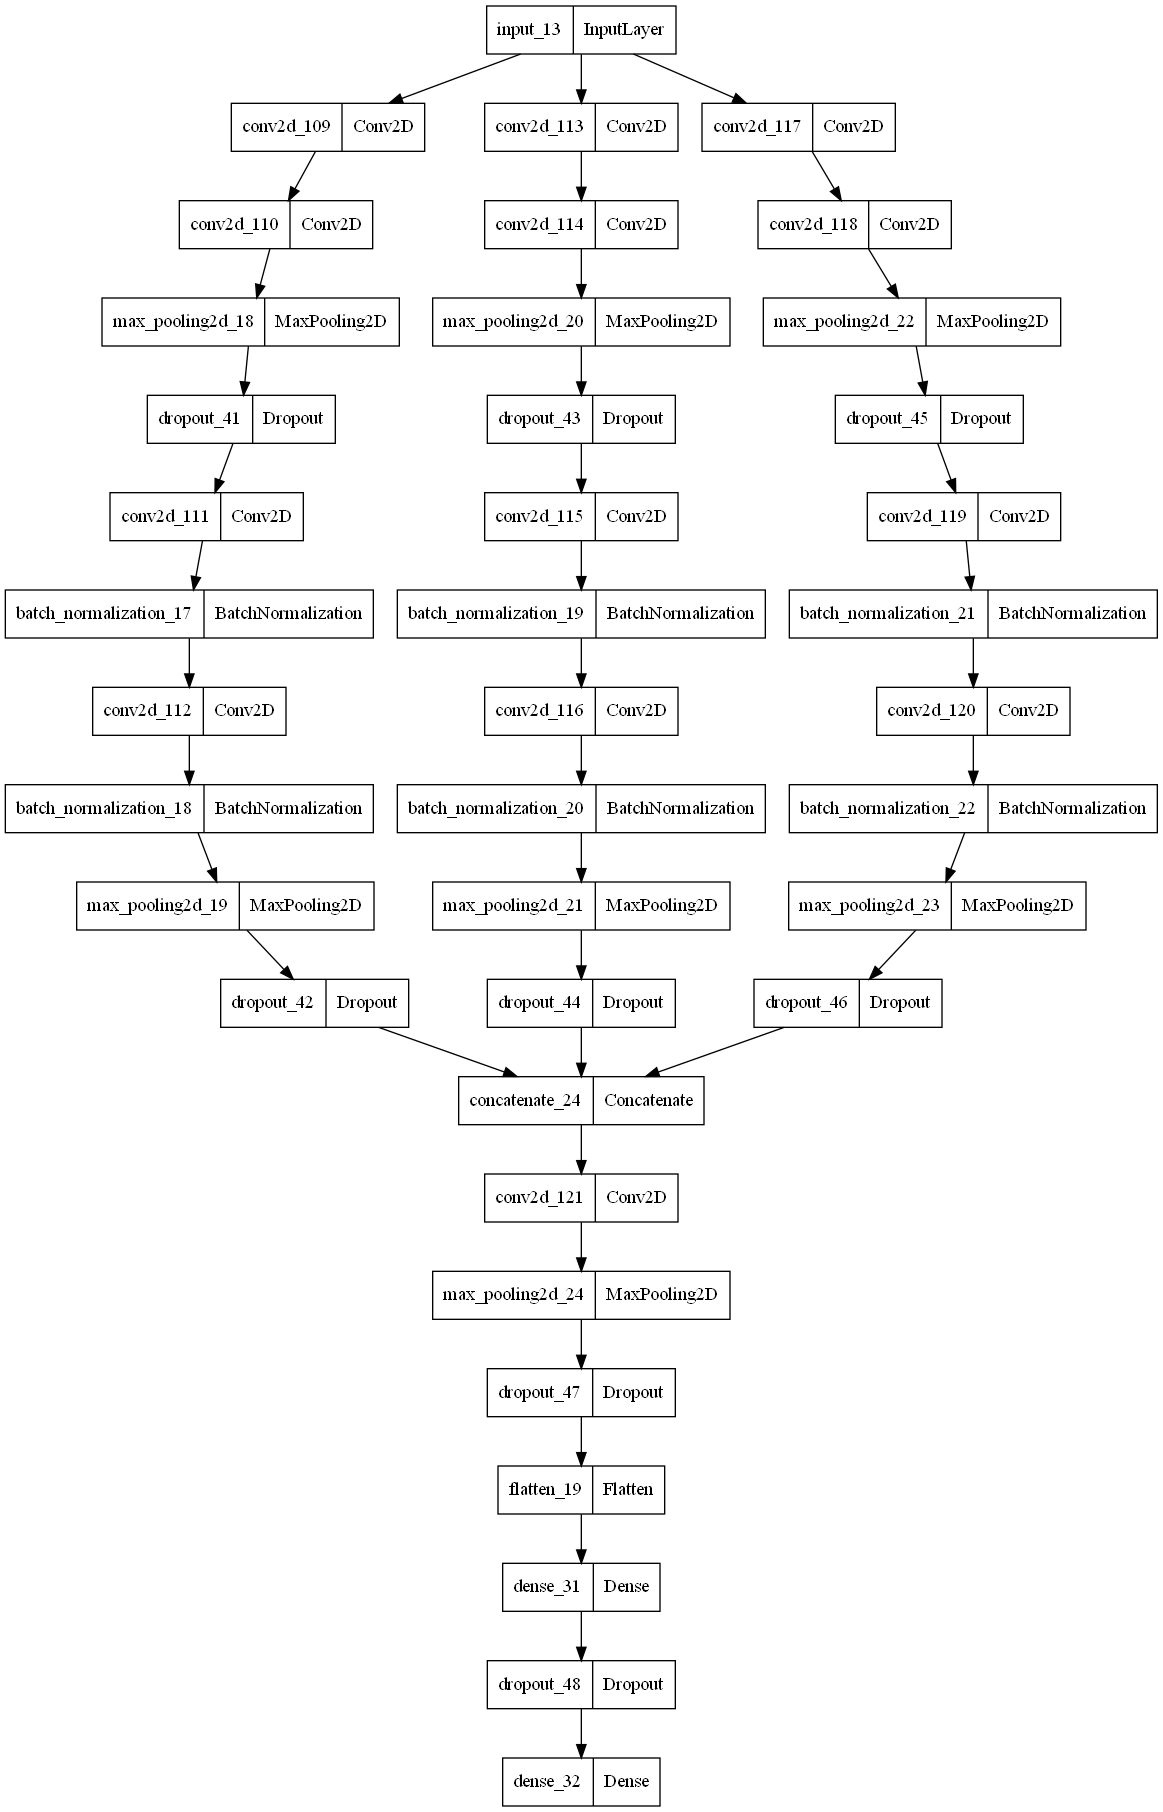

In [93]:
from keras.utils import plot_model
plot_model(model)

In [94]:
## Preparing data using Data Generator

def preprocessingImages1(path):
  """
  input: path
  output: Preprocessed images
  """
  ## Data Augmentation
  image_data = ImageDataGenerator(zoom_range=0.2, shear_range=0.2, rescale=1/255, horizontal_flip=True)
  image = image_data.flow_from_directory(directory = path, target_size = (28,28), batch_size = 32, class_mode='categorical', color_mode='grayscale')

  return image

In [95]:
path = "./TRAIN"
train_data = preprocessingImages1(path)

Found 4150 images belonging to 10 classes.


In [96]:
path = "./VALIDATION"
val_data = preprocessingImages1(path)

Found 850 images belonging to 10 classes.


In [97]:

def preprocessingImages2(path):
  """
  input: path
  output: Preprocessed images
  """
  ## Data Augmentation
  image_data = ImageDataGenerator(rescale=1/255)
  image = image_data.flow_from_directory(directory = path, target_size = (28,28), batch_size = 32, class_mode='categorical',color_mode='grayscale')

  return image

In [98]:
path = "./TEST"
test_data = preprocessingImages1(path)

Found 850 images belonging to 10 classes.


In [99]:
## Early Stopping and Model Checking

## Callbacks

from keras.callbacks import EarlyStopping, ModelCheckpoint

## EarlyStopping
es = EarlyStopping(monitor = 'val_accuracy', min_delta = 0.01, patience = 6, verbose = 1, mode = 'auto')

## ModelCheckpoint
mc = ModelCheckpoint(filepath = "./bestmodel.h5", monitor = 'val_accuracy', mode = 'auto', verbose = 1, save_best_only = True)

cb = [es, mc]

In [100]:
## Model Training
hs = model.fit(train_data, steps_per_epoch=100, epochs=100, verbose=1, validation_data=val_data, validation_steps=16, callbacks=cb)

Epoch 1/100
100/100 [==============================] - ETA: 0s - loss: 2.1783 - accuracy: 0.2890
Epoch 1: val_accuracy improved from -inf to 0.19336, saving model to .\bestmodel.h5
100/100 [==============================] - 42s 388ms/step - loss: 2.1783 - accuracy: 0.2890 - val_loss: 2.2023 - val_accuracy: 0.1934
Epoch 2/100
100/100 [==============================] - ETA: 0s - loss: 1.2257 - accuracy: 0.5730
Epoch 2: val_accuracy did not improve from 0.19336
100/100 [==============================] - 40s 397ms/step - loss: 1.2257 - accuracy: 0.5730 - val_loss: 2.9293 - val_accuracy: 0.1719
Epoch 3/100
100/100 [==============================] - ETA: 0s - loss: 0.8571 - accuracy: 0.7066
Epoch 3: val_accuracy improved from 0.19336 to 0.46875, saving model to .\bestmodel.h5
100/100 [==============================] - 41s 406ms/step - loss: 0.8571 - accuracy: 0.7066 - val_loss: 1.4453 - val_accuracy: 0.4688
Epoch 4/100
100/100 [==============================] - ETA: 0s - loss: 0.7060 - accur

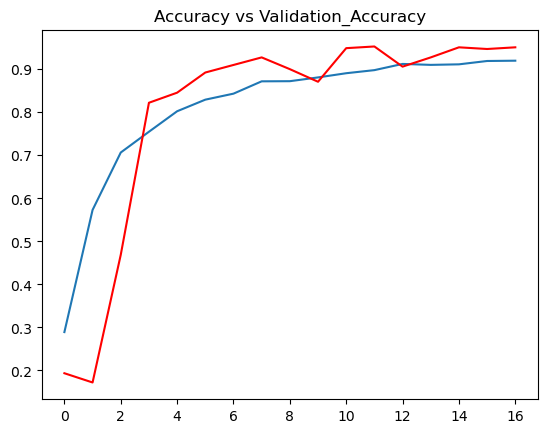

In [101]:
## Model Graphical Interpretation
h = hs.history
h.keys()
plt.plot(h['accuracy'])
plt.plot(h['val_accuracy'], c='red')

plt.title('Accuracy vs Validation_Accuracy')
plt.show()

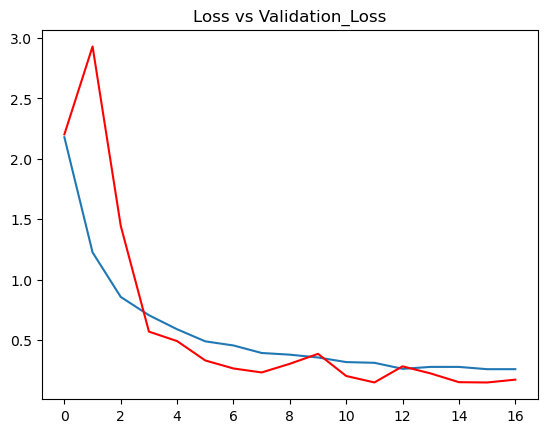

In [102]:
plt.plot(h['loss'])
plt.plot(h['val_loss'], c='red')

plt.title('Loss vs Validation_Loss')
plt.show()

In [103]:
## Model Accuracy
from keras.models import load_model
model = load_model("bestmodel.h5")
acc = model.evaluate_generator(test_data)[1]
print(f" The accuracy of the model is {acc} ")

 The accuracy of the model is 0.9494117498397827 


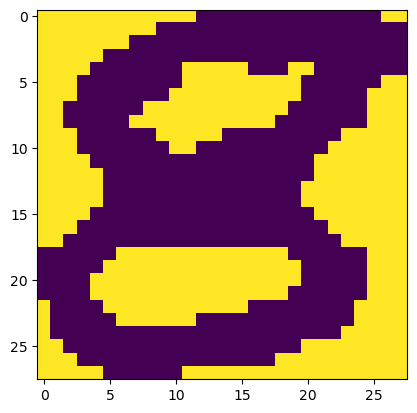

1/1 [==============================] - 0s 296ms/step


In [104]:
from keras_preprocessing.image import load_img, img_to_array
path = "TEST/4/bn00364.bmp"
img = load_img(path, target_size = (28,28), color_mode="grayscale")
input_arr = img_to_array(img)/255

plt.imshow(input_arr)
plt.show()

input_arr.shape
input_arr = np.expand_dims(input_arr, axis = 0)
pred = model.predict(input_arr)[0][0]

